In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\iltya\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("data/dataset_fd_Sp_no-Mos.csv", index_col=0)

In [4]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0])).reset_index().set_index("region")

In [5]:
agg_df = agg_df.groupby("federal_district").agg({"infections":"sum", "unemployed":"sum", "population":"mean", "federal_district":lambda x: x.iloc[0]})

In [6]:
agg_df["procent_unemployed"] = agg_df.unemployed / agg_df.population

In [7]:
agg_df["procent_infected"] = agg_df.infections / agg_df.population

In [8]:
agg_df

,infections,unemployed,population,federal_district,procent_unemployed,procent_infected
federal_district,,,,,,
ДФО,97589.0,248153,8.118915e+05,ДФО,0.305648,0.120200
ПФО,204153.0,823752,2.091977e+06,ПФО,0.393767,0.097589
СЗФО,194088.0,359956,1.393788e+06,СЗФО,0.258257,0.139252
СКФО,70617.0,743087,1.418705e+06,СКФО,0.523778,0.049776
СФО,150880.0,540556,1.711839e+06,СФО,0.315775,0.088139
УФО,116630.0,400474,2.060125e+06,УФО,0.194393,0.056613
ЦФО,266823.0,640022,1.573852e+06,ЦФО,0.406660,0.169535
ЮФО,101956.0,590845,2.058260e+06,ЮФО,0.287060,0.049535


In [9]:
agg_df.drop("federal_district", axis=1, inplace=True)
one = agg_df[["procent_infected"]].reset_index().rename({"procent_infected":"value"}, axis=1)
two = agg_df[["procent_unemployed"]].reset_index().rename({"procent_unemployed":"value"}, axis=1)

In [10]:
one["kind"] = "Процент выявленных случаев заболевания"
two["kind"] = "Процент поданных заявок на пособие по безработице"

In [11]:
tmp = one.append(two)

C:\Users\iltya\AppData\Local\Temp\ipykernel_10412\3706551119.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = one.append(two)


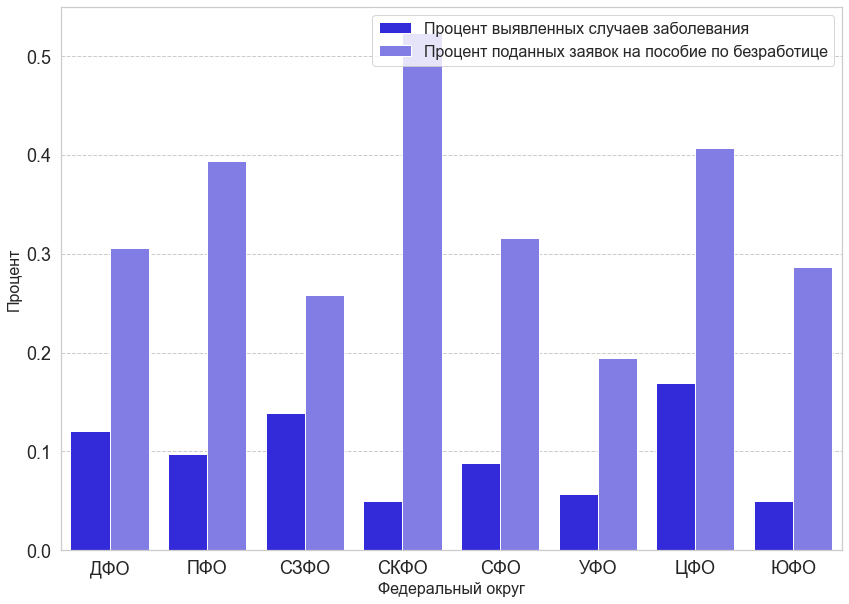

In [12]:
color1 = "#190DF6"
color2 = "#736cf5"

# Создайте градиент от color1 к color2
custom_palette = sns.color_palette([color1, color2], as_cmap=True)

# Используйте вашу палитру в barplot

plt.figure(figsize=(14, 10))
sns.set(rc={'font.size': 12, 'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid", {'grid.color': '.8', 'grid.linestyle': '--'})
sns.set_palette(custom_palette)
ax = sns.barplot(data=tmp, x="federal_district", y="value", hue="kind",  )

ax.set_xlabel('Федеральный округ', fontsize=16)  # Set font size for x-axis label
ax.set_ylabel('Процент', fontsize=16)  # Set font size for y-axis label

ax.legend(fontsize='16', title_fontsize='14')

ax.tick_params(axis='both', labelsize=18)   # Set font size for tick labels

In [13]:
df = pd.read_csv("data/dataset_1.csv")
df_region_metric = pd.read_csv("data/dataset_1_regions_merged.csv", index_col=0).set_index("region")

In [14]:
columns_to_drop = ['healed', 'infections', 'unemployed', 'deaths', 'population']
df_region_metric.drop(columns_to_drop, axis=1, inplace=True)

In [15]:
df = pd.merge(df, df_region_metric, left_on="region", right_index=True)

In [16]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
0,2020-04-06,Адыгея,"Строительство, ремонт, стройматериалы, недвижи...",19,18,0,3,12,19,19,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
1,2020-04-06,Адыгея,Машиностроение,2,1,0,0,1,1,2,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,2020-04-06,Адыгея,Юриспруденция,13,6,0,2,11,13,13,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,2020-04-06,Адыгея,Пищевая промышленность,9,2,1,2,6,9,9,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,2020-04-06,Адыгея,"Государственная служба, некоммерческие организ...",17,8,0,3,14,17,17,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75089,2020-10-26,Ярославская,"Услуги населению, сервисное обслуживание",2,0,1,2,2,2,2,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75090,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75091,2020-10-26,Ярославская,Электроэнергетика,1,1,0,0,1,1,1,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75092,2020-10-26,Ярославская,"Химическая, нефтехимическая, топливная промышл...",1,1,0,0,0,0,1,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


### Гипотеза
Количество заявок на пособие по безработице взаимосвязано с эпидемиологический обстановкой в регионе в период пандемии COVID19

## проверим наличие зависимостей на уровне регион-неделя

In [17]:
# agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
#                                             unemployed=("unemployed", "sum"),
#                                             population=("population", "mean")).reset_index()
#
# # отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
# agg_df["infections"] = agg_df["infections"] / agg_df["population"]
# agg_df["unemployed"] = agg_df["unemployed"] / agg_df["population"]
#
# plt.figure(figsize=(15, 8))
# plt.yscale("log")
# plt.xscale("log")
# sns.scatterplot(data = agg_df, x="infections", y="unemployed", color=color1)
# plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n за неделю \n (обе величины отнормированы на население региона)",
#           fontsize=16
#           )
# None

посчитаем корелляцию кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе за неделю

Ярко выраженной зависимости ожидаемо нет, так как согласно механизму заболеваемость *отложенно* влияет на экономику региона

## проверим наличие зависимостей на уровне различных регионов
Оценим суммарное кол-во зарегестрированных случаев
?Будем считать что оно высоко коррелирует с реальной эпидемиологической обстановкой
Посчитаем на суммарное кол-ве поданных заявок на пособие по безработице
Посмотрим на корелляцию данных величин

In [18]:
# agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
#                                             unemployed=("unemployed", "sum"),
#                                             population=("population", "mean"),
#                                             federal_district=("federal_district", lambda x: x.iloc[0]))
#
# agg_df = agg_df.groupby("region").agg(sum_infections=("infections", "sum"),
#                              sum_unemployed=("unemployed", "sum"),
#                              population=("population", "mean"),
#                              federal_district=("federal_district", lambda x: x.iloc[0]))
#
# # отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
# agg_df["sum_infections"] = agg_df["sum_infections"] / agg_df["population"]
# agg_df["sum_unemployed"] = agg_df["sum_unemployed"] / agg_df["population"]
#
# plt.figure(figsize=(15, 8))
# plt.yscale("log")
# plt.xscale("log")
# sns.scatterplot(data = agg_df, x="sum_infections", y="sum_unemployed", hue="federal_district")
# plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n ЗА ВЕСЬ ПЕРИОД ПАНДЕМИИ \n (обе величины отнормированы на население региона)")
# None

In [19]:
# np.corrcoef(agg_df[["sum_infections", "sum_unemployed"]].transpose())

Значимого уровня корреляции между исследуемыми показателями не найдено

## регрессионный анализ
Чтобы проверить наличие взаимосвязи между количеством заявок на пособие по безработице и регистрируемым количеством заболеваний воспользуемся оценкой модели со случайными эффектами

предпосылки к использованию модели со случаынйми эффектами - ?
какие тесты надо дополнительно провести?

In [20]:
df["Rt"] = df.Rt.fillna(df.Rt.median())

In [21]:
df.columns

Index(['week', 'region', 'oced', 'unemployed', 'cv_gender', 'cv_birthday_2000',
       'cv_birthday_1990', 'cv_birthday_1980', 'cv_birthday_1970',
       'cv_birthday_1960', 'population', 'men', 'women', 'infections',
       'deaths', 'healed', 'tests', 'Rt', 'level', 'yandex_continuous',
       'yandex_level', 'pass', 'procent_unemployed', 'procent_infections',
       'procent_healed', 'procent_deaths', 'fin_blago', 'depo_mean',
       'depo_salary', 'income_fix', 'poverty_proc', 'ex_poverty_proc',
       'social_exp', 'growth_social_exp', 'soc_in_total_exp'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75094 entries, 0 to 75093
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   week                75094 non-null  object 
 1   region              75094 non-null  object 
 2   oced                75094 non-null  object 
 3   unemployed          75094 non-null  int64  
 4   cv_gender           75094 non-null  int64  
 5   cv_birthday_2000    75094 non-null  int64  
 6   cv_birthday_1990    75094 non-null  int64  
 7   cv_birthday_1980    75094 non-null  int64  
 8   cv_birthday_1970    75094 non-null  int64  
 9   cv_birthday_1960    75094 non-null  int64  
 10  population          75094 non-null  float64
 11  men                 75094 non-null  float64
 12  women               75094 non-null  float64
 13  infections          75094 non-null  float64
 14  deaths              75094 non-null  float64
 15  healed              75094 non-null  float64
 16  test

In [23]:
# df["yandex_continuous"] = df.yandex_continuous.fillna(df.yandex_continuous.mean())

In [24]:
df = df.dropna(axis=1)

In [25]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
0,2020-04-06,Адыгея,"Строительство, ремонт, стройматериалы, недвижи...",19,18,0,3,12,19,19,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
1,2020-04-06,Адыгея,Машиностроение,2,1,0,0,1,1,2,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,2020-04-06,Адыгея,Юриспруденция,13,6,0,2,11,13,13,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,2020-04-06,Адыгея,Пищевая промышленность,9,2,1,2,6,9,9,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,2020-04-06,Адыгея,"Государственная служба, некоммерческие организ...",17,8,0,3,14,17,17,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75089,2020-10-26,Ярославская,"Услуги населению, сервисное обслуживание",2,0,1,2,2,2,2,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75090,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75091,2020-10-26,Ярославская,Электроэнергетика,1,1,0,0,1,1,1,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75092,2020-10-26,Ярославская,"Химическая, нефтехимическая, топливная промышл...",1,1,0,0,0,0,1,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


In [26]:
df = df.drop(["cv_gender", "cv_birthday_1960", "cv_birthday_1970",
         "cv_birthday_1980", "cv_birthday_1990", "cv_birthday_2000", "men",
         "women", "oced"], axis=1)

In [27]:
import random

name_extra_features = df.columns.tolist()[3:]
dict_extra_features = {i: (i, "mean") for i in name_extra_features}

In [28]:
df_panel = df.copy()
df_panel["week"] = pd.to_datetime(df_panel["week"])
df_panel = df_panel.groupby(["region", "week"]).agg(
    sum_unemployed=("unemployed", "sum"),
    **dict_extra_features
)

In [29]:
df_panel = df_panel.reset_index()

In [30]:
df_panel["sum_unemployed"] /= df_panel["population"]
df_panel["infections"] /= df_panel["population"]
df_panel["deaths"] /= df_panel["population"]
df_panel["healed"] /= df_panel["population"]

In [31]:
df_panel

,region,week,sum_unemployed,population,infections,deaths,healed,Rt,procent_unemployed,procent_infections,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
0,Адыгея,2020-04-06,0.000980,463088.0,0.000091,0.000000e+00,0.000095,0.873684,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
1,Адыгея,2020-04-13,0.003347,463088.0,0.000600,4.318834e-06,0.000503,1.166667,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,Адыгея,2020-04-20,0.002663,463088.0,0.000173,4.318834e-06,0.000024,2.478261,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,Адыгея,2020-04-27,0.002144,463088.0,0.000091,2.159417e-06,0.000035,1.217391,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,Адыгея,2020-05-04,0.001106,463088.0,0.000045,0.000000e+00,0.000035,1.000000,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,Ярославская,2020-09-28,0.000630,1253389.0,0.000275,7.978369e-07,0.000248,1.046632,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2486,Ярославская,2020-10-05,0.000586,1253389.0,0.000133,0.000000e+00,0.000065,0.951220,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2487,Ярославская,2020-10-12,0.000540,1253389.0,0.000487,0.000000e+00,0.000645,1.004000,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2488,Ярославская,2020-10-19,0.000551,1253389.0,0.000540,1.595674e-06,0.000351,1.203488,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


In [32]:
df_panel["infections"] = df_panel["infections"].shift(1)

In [33]:
df_panel = df_panel.dropna()

In [34]:
df_panel

,region,week,sum_unemployed,population,infections,deaths,healed,Rt,procent_unemployed,procent_infections,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
1,Адыгея,2020-04-13,0.003347,463088.0,0.000091,4.318834e-06,0.000503,1.166667,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,Адыгея,2020-04-20,0.002663,463088.0,0.000600,4.318834e-06,0.000024,2.478261,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,Адыгея,2020-04-27,0.002144,463088.0,0.000173,2.159417e-06,0.000035,1.217391,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,Адыгея,2020-05-04,0.001106,463088.0,0.000091,0.000000e+00,0.000035,1.000000,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
5,Адыгея,2020-05-11,0.002138,463088.0,0.000045,4.318834e-06,0.000402,0.967033,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,Ярославская,2020-09-28,0.000630,1253389.0,0.000262,7.978369e-07,0.000248,1.046632,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2486,Ярославская,2020-10-05,0.000586,1253389.0,0.000275,0.000000e+00,0.000065,0.951220,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2487,Ярославская,2020-10-12,0.000540,1253389.0,0.000133,0.000000e+00,0.000645,1.004000,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2488,Ярославская,2020-10-19,0.000551,1253389.0,0.000487,1.595674e-06,0.000351,1.203488,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


In [35]:
df_panel.to_csv("data/dataset_agregared.csv")

In [36]:
df_panel

,region,week,sum_unemployed,population,infections,deaths,healed,Rt,procent_unemployed,procent_infections,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
1,Адыгея,2020-04-13,0.003347,463088.0,0.000091,4.318834e-06,0.000503,1.166667,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,Адыгея,2020-04-20,0.002663,463088.0,0.000600,4.318834e-06,0.000024,2.478261,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,Адыгея,2020-04-27,0.002144,463088.0,0.000173,2.159417e-06,0.000035,1.217391,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,Адыгея,2020-05-04,0.001106,463088.0,0.000091,0.000000e+00,0.000035,1.000000,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
5,Адыгея,2020-05-11,0.002138,463088.0,0.000045,4.318834e-06,0.000402,0.967033,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,Ярославская,2020-09-28,0.000630,1253389.0,0.000262,7.978369e-07,0.000248,1.046632,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2486,Ярославская,2020-10-05,0.000586,1253389.0,0.000275,0.000000e+00,0.000065,0.951220,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2487,Ярославская,2020-10-12,0.000540,1253389.0,0.000133,0.000000e+00,0.000645,1.004000,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2488,Ярославская,2020-10-19,0.000551,1253389.0,0.000487,1.595674e-06,0.000351,1.203488,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


### проверим коллениарность данных

In [50]:
columns_for_x = ['infections', "Rt", 'population',
 'deaths', 'healed', 'procent_infections','procent_deaths',
 'depo_mean','depo_salary','income_fix','poverty_proc',
 'social_exp','growth_social_exp']
name_y = "sum_unemployed"

### проверить Коэффициенты Вариации (VIF)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

tmp = df_panel[columns_for_x] # .drop(["week", "region"], axis=1)

# X - матрица признаков
vif_data = pd.DataFrame()
vif_data["Variable"] = tmp.columns
vif_data["VIF"] = [variance_inflation_factor(tmp.values, i) for i in range(tmp.shape[1])]

In [52]:
vif_data

,Variable,VIF
0,infections,2.906359
1,Rt,2.206022
2,population,4.630088
3,deaths,2.851743
4,healed,3.424772
5,procent_infections,15.010320
6,procent_deaths,6.943766
7,depo_mean,22.573024
8,depo_salary,22.264031
9,income_fix,25.821790


<AxesSubplot:>

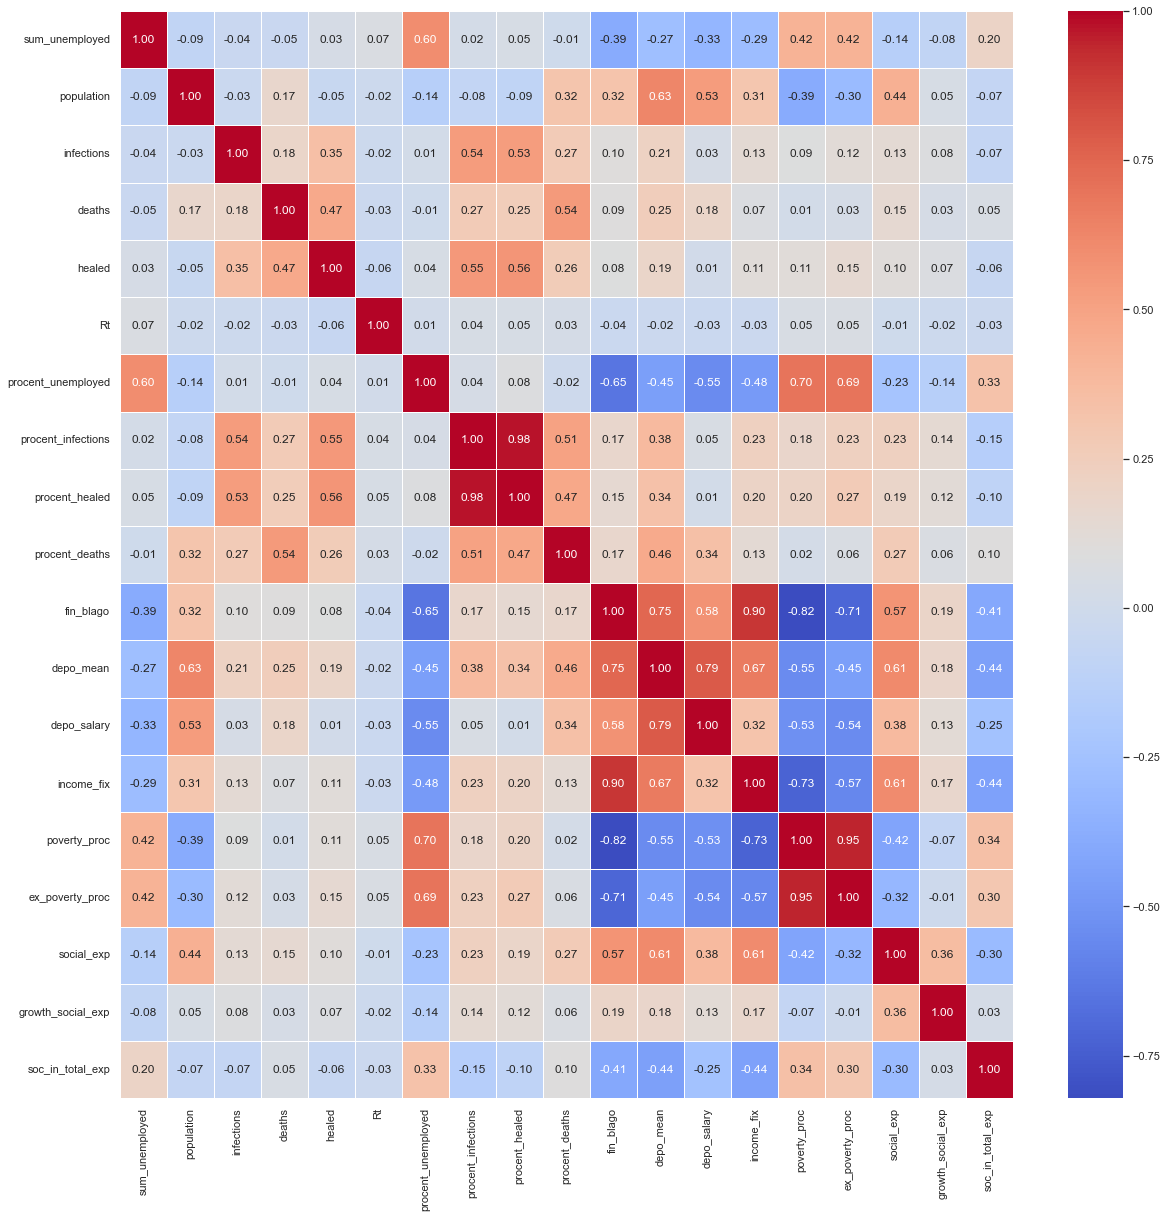

In [53]:
plt.figure(figsize=(20, 20))
corr =df_panel.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [54]:
tmp = df_panel.reset_index()
tmp['week'] = pd.Categorical(tmp['week'])
tmp['region'] = pd.Categorical(tmp['region'])

In [55]:
tmp.head()

,index,region,week,sum_unemployed,population,infections,deaths,healed,Rt,procent_unemployed,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
0,1,Адыгея,2020-04-13,0.003347,463088.0,0.000091,0.000004,0.000503,1.166667,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
1,2,Адыгея,2020-04-20,0.002663,463088.0,0.000600,0.000004,0.000024,2.478261,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,3,Адыгея,2020-04-27,0.002144,463088.0,0.000173,0.000002,0.000035,1.217391,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,4,Адыгея,2020-05-04,0.001106,463088.0,0.000091,0.000000,0.000035,1.000000,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,5,Адыгея,2020-05-11,0.002138,463088.0,0.000045,0.000004,0.000402,0.967033,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6


In [57]:
formula = f'{name_y} ~ ' + ' + '.join(columns_for_x) + ' + C(region) + C(week)'

In [58]:
import statsmodels.api as sm

model = sm.OLS.from_formula(formula, data=tmp)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 5})

In [59]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         sum_unemployed   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     53.88
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:54:34   Log-Likelihood:                 14860.
No. Observations:                2489   AIC:                        -2.949e+04
Df Residuals:                    2373   BIC:                        -2.881e+04
Df Model:                         115                                         
Covariance Type:                  HAC                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

c:\users\iltya\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 124, but rank is 113
  warnings.warn('covariance of constraints does not have full '


## дальше мрак

In [60]:
# panel_data['id'] = pd.Categorical(panel_data['id'])
# panel_data['time'] = pd.Categorical(panel_data['time'])
#
# # Оценка модели с фиксированными эффектами
# model = sm.PanelOLS.from_formula('y ~ x1 + x2 + EntityEffects + TimeEffects', data=panel_data)
# results = model.fit()

In [358]:

dependent_variable = 'sum_unemployed'


explanatory_variables = ['sum_infections', "yandex_metric", "rt_coef"] + ['depo_mean_19',
 'depo_salary_19',
 'growth_depo_19',
 'curr_depo_perc_19',
 'fin_wealth_19',
 'soceco_wealth_19',
 'depo_mean_20',
 'depo_salary_20',
 'depo_mean_21',
 'depo_salary_21']

individual_variable = 'region'
time_variable = 'week'

# Модель с фиксированными эффектами
model_fe = PanelOLS.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects', df_panel)


# Оцените обе модели
results_fe = model_fe.fit(cov_type='kernel', kernel='bartlett', check_rank=False)

# Модель со случайными эффектами
# model_re = RandomEffects.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)}', df_panel)
# results_re = model_re.fit()



FactorEvaluationError: Unable to evaluate factor `growth_depo_19`. [NameError: `growth_depo_19` is not present in the dataset or evaluation context.]

In [309]:
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:         sum_unemployed   R-squared:                        0.0177
Estimator:                   PanelOLS   R-squared (Between):              0.5719
No. Observations:                2310   R-squared (Within):               0.0177
Date:                Mon, Dec 11 2023   R-squared (Overall):              0.3533
Time:                        22:18:38   Log-likelihood                 1.248e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      13.384
Entities:                          77   P-value                           0.0000
Avg Obs:                       30.000   Distribution:                  F(3,2230)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             1.8146
                            

In [255]:
from statsmodels.datasets import grunfeld

data = grunfeld.load_pandas().data
data = data.set_index(["firm", "year"])
data.head()

invest   value  capital
firm           year                           
General Motors 1935.0   317.6  3078.5      2.8
               1936.0   391.8  4661.7     52.6
               1937.0   410.6  5387.1    156.9
               1938.0   257.7  2792.2    209.2
               1939.0   330.8  4313.2    203.4

In [39]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula("invest ~ value + capital + EntityEffects", data=data)
print(mod.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:                 invest   R-squared:                        0.7667
Estimator:                   PanelOLS   R-squared (Between):              0.8223
No. Observations:                 220   R-squared (Within):               0.7667
Date:                Sun, Dec 10 2023   R-squared (Overall):              0.8132
Time:                        22:31:09   Log-likelihood                   -1167.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      340.08
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(2,207)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             340.08
                            

In [30]:
f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects'

'sum_unemployed ~ sum_infections + EntityEffects'